<p>
    <b><h1 align="center">Module 01: Basic Statistics</h1></b>
</p>

---

## Contents

1. [Data Overview & Summary](#data-overview--summary)
   - [Data & Library Import](#data--library-import)
   - [Head & Tail, shape](#head--tail-shape)  
   - [Columns & Info](#columns--info)  
   - [Missing Values](#missing-values)  
   - [Numerical Summary](#numerical-summary)  

2. [Central Tendency, Dispersion & Outliers](#central-tendency-dispersion--outliers)  
   - [Measures of Central Tendency](#measures-of-central-tendency)  
   - [Measures of Dispersion](#measures-of-dispersion)  
   - [Covariance & Correlation](#covariance--correlation)  
   - [Categorical Counts](#categorical-counts)  
   - [Outlier Detection (IQR Method)](#outlier-detection-iqr-method)  
   - [Distribution Shape](#distribution-shape)  

3. [Distribution Analysis & Basic Visualizations](#distribution-analysis--basic-visualizations)  
   - [Correlation Heatmap](#correlation-heatmap)  
   - [Categorical Columns Visualization](#categorical-columns-visualization)  
   - [Numerical Columns Visualization](#numerical-columns-visualization)  
      - [Histogram + KDE](#histogram--kde)  
      - [Violin + Boxplots](#violin--boxplots)  
   - [Grouped Visualizations](#grouped-visualizations)  
      - [Average Math Score by Gender](#average-math-score-by-gender)  
      - [Reading Score by Lunch Type](#reading-score-by-lunch-type)  
   - [Pairwise Relationships](#pairwise-relationships)


## Data Overview & Summary

### Data & Library Import

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
data = pd.read_csv('StudentsPerformance.csv')

### Head & Tail, shape

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [22]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [4]:
data.shape

(1000, 8)

### Columns & Info

In [5]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Missing Values

In [7]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Numerical Summary

In [8]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Central Tendency, Dispersion & Outliers

### Measures of Central Tendency

In [9]:
data['math score'].mean()

np.float64(66.089)

In [10]:
data['reading score'].median()

np.float64(70.0)

In [15]:
data['writing score'].mode()

0    74
Name: writing score, dtype: int64

###  Measures of Dispersion

In [11]:
data['writing score'].std()

np.float64(15.19565701086965)

In [16]:
data['reading score'].var()

np.float64(213.16560460460462)

In [29]:
range_val = data['math score'].max() - data['math score'].min()
print("Range:", range_val)

Range: 100


In [13]:
data['reading score'].max()

np.int64(100)

In [28]:
data['reading score'].min()

np.int64(17)

In [74]:
data['math score'].quantile(0.25)

np.float64(57.0)

In [75]:
data['reading score'].quantile(0.50)

np.float64(70.0)

In [26]:
data['writing score'].quantile(0.75)

np.float64(79.0)

### Covariance & Correlation

In [37]:
corr = data.corr(numeric_only=True)
corr

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [44]:
data.cov(numeric_only=True)

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


### Categorical Counts

In [20]:
data['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [21]:
data['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

### Outlier Detection (IQR Method)

In [ ]:
num_col = ['math score', 'reading score', 'writing score']

Q1 = data[num_col].quantile(0.25)
Q3 = data[num_col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
 
for col in num_col:
    outlier_count = ((data[col] < lower_bound[col]) | (data[col] > upper_bound[col])).sum()
    print(f"{col} outliers = {outlier_count}")


math score outliers = 8
reading score outliers = 6
writing score outliers = 5


### Distribution Shape

In [33]:
data['math score'].skew()

np.float64(-0.27893514909431694)

In [36]:
data['reading score'].kurtosis()

np.float64(-0.0682654585647704)

## Distribution Analysis & Basic Visualizations

### Correlation Heatmap

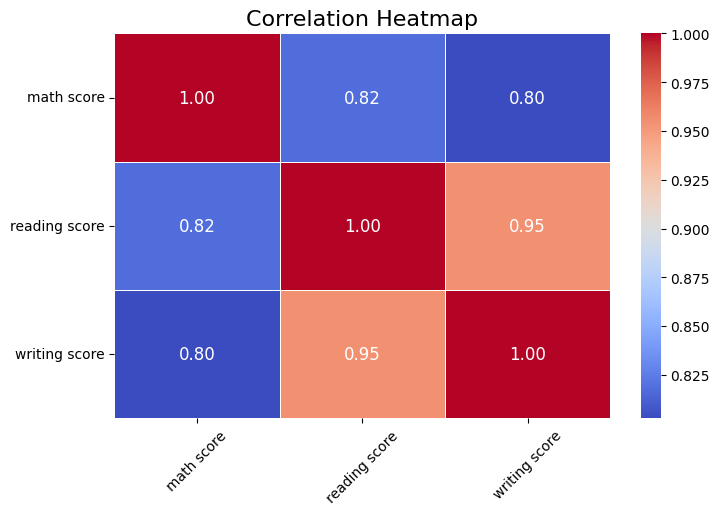

In [ ]:
plt.figure(figsize=(8,5))   
sns.heatmap(corr, 
            annot=True,            
            fmt=".2f",             
            cmap="coolwarm",       
            linewidths=0.5,        
            annot_kws={"size":12})  
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45)       
plt.yticks(rotation=0)         
plt.show()

### Categorical Columns Visualization

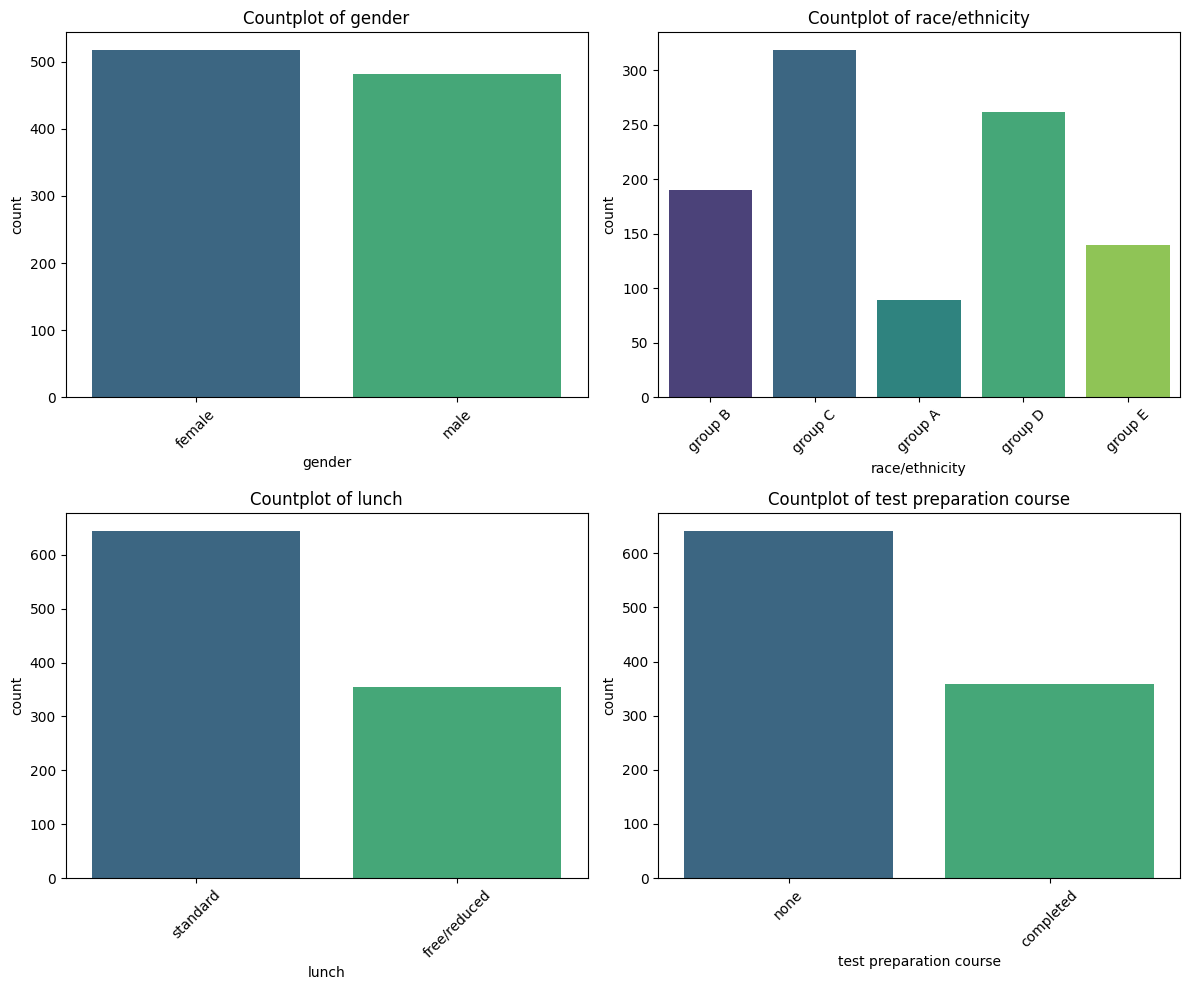

In [65]:
important_cat = ['gender', 'race/ethnicity', 'lunch', 'test preparation course']

fig, axes = plt.subplots(2, 2, figsize=(12,10))
axes = axes.flatten()   

for i, col in enumerate(important_cat):
    sns.countplot(x=col, data=data, palette="viridis", ax=axes[i])
    axes[i].set_title(f"Countplot of {col}", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Numerical Columns Visualization

#### Histogram + KDE

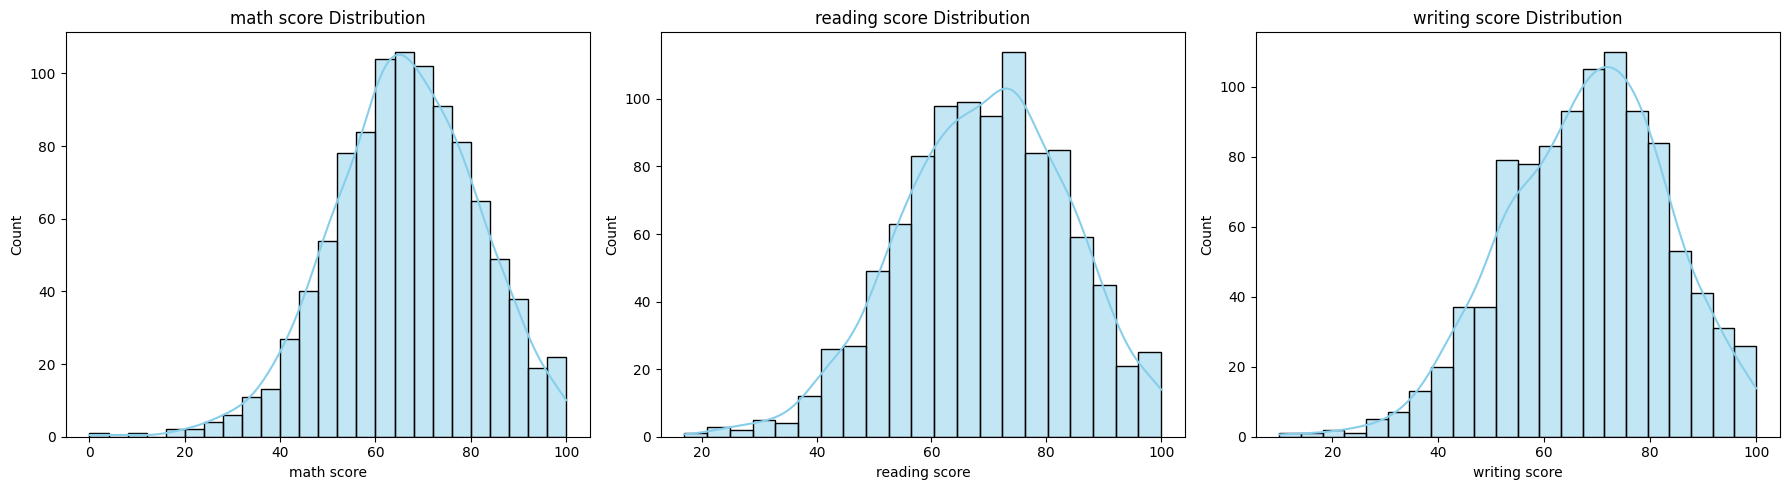

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

for i, col in enumerate(num_col):
    
    sns.histplot(data[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f"{col} Distribution", fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()


#### Violin + Boxplots

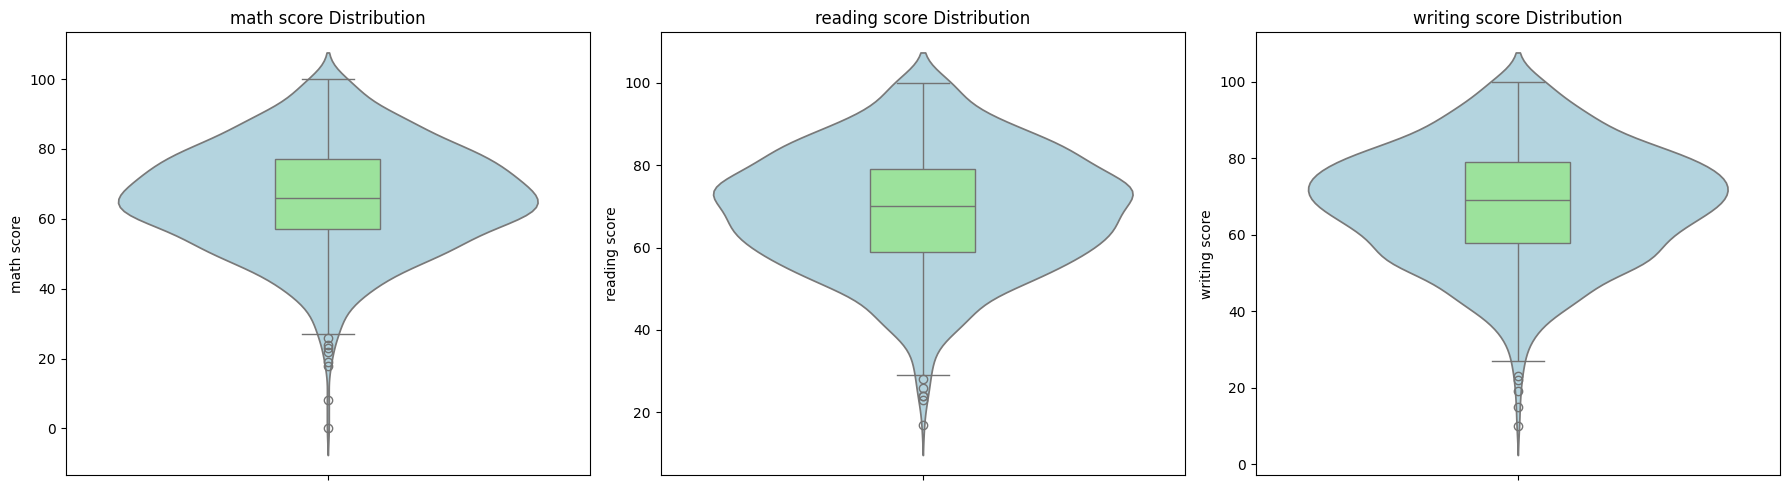

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

for i, col in enumerate(num_col):
    sns.violinplot(y=data[col], ax=axes[i], inner=None, color="lightblue")
    sns.boxplot(y=data[col], ax=axes[i], width=0.2, color="lightgreen")
    axes[i].set_title(f"{col} Distribution", fontsize=12)
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


### Grouped Visualizations

#### Average Math Score by Gender

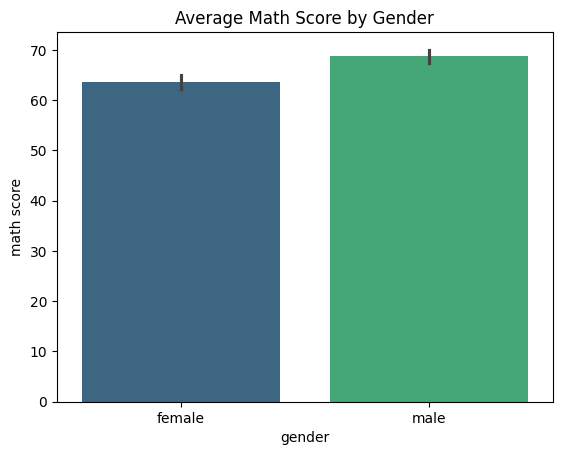

In [68]:
sns.barplot(x='gender', y='math score', data=data, palette='viridis')
plt.title("Average Math Score by Gender")
plt.show()

#### Reading Score by Lunch Type

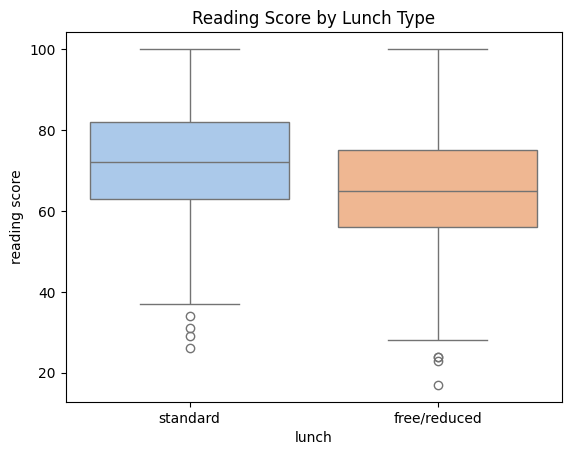

In [70]:
sns.boxplot(x='lunch', y='reading score', data=data, palette='pastel')
plt.title("Reading Score by Lunch Type")
plt.show()

### Pairwise Relationships

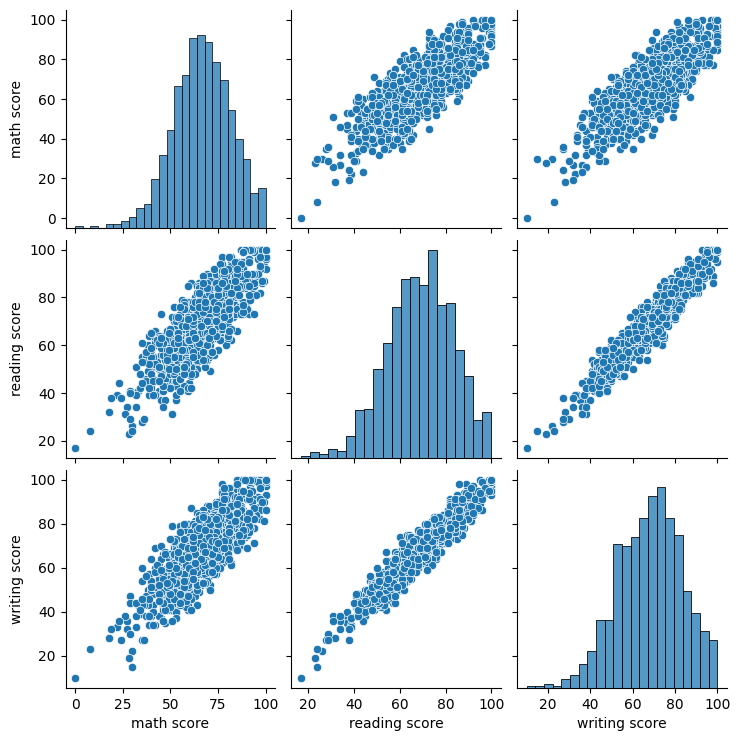

In [72]:
sns.pairplot(data)
plt.show()
